In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, single, cophenet, fcluster

In [3]:
dist_dat = np.genfromtxt("binding_pocket_clustering_1a_sort.txt", names=True, dtype=None)
distmat = dist_dat["dist"]
structs = np.unique(np.concatenate((dist_dat["I"], dist_dat["J"])))

/Users/sid/miniconda3/envs/conda-forge-only/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


In [4]:
print(len(structs))
structs

22


array([b'x0072', b'x0104', b'x0107', b'x0161', b'x0195', b'x0305',
       b'x0354', b'x0387', b'x0395', b'x0397', b'x0426', b'x0434',
       b'x0540', b'x0678', b'x0874', b'x0946', b'x0967', b'x0991',
       b'x0995', b'x1077', b'x1093', b'x1249'], dtype='|S5')

In [5]:
Z = single(distmat)
c, coph_dists = cophenet(Z, distmat)
c
## "This (very very briefly) compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances"
## https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

0.9366547894165618

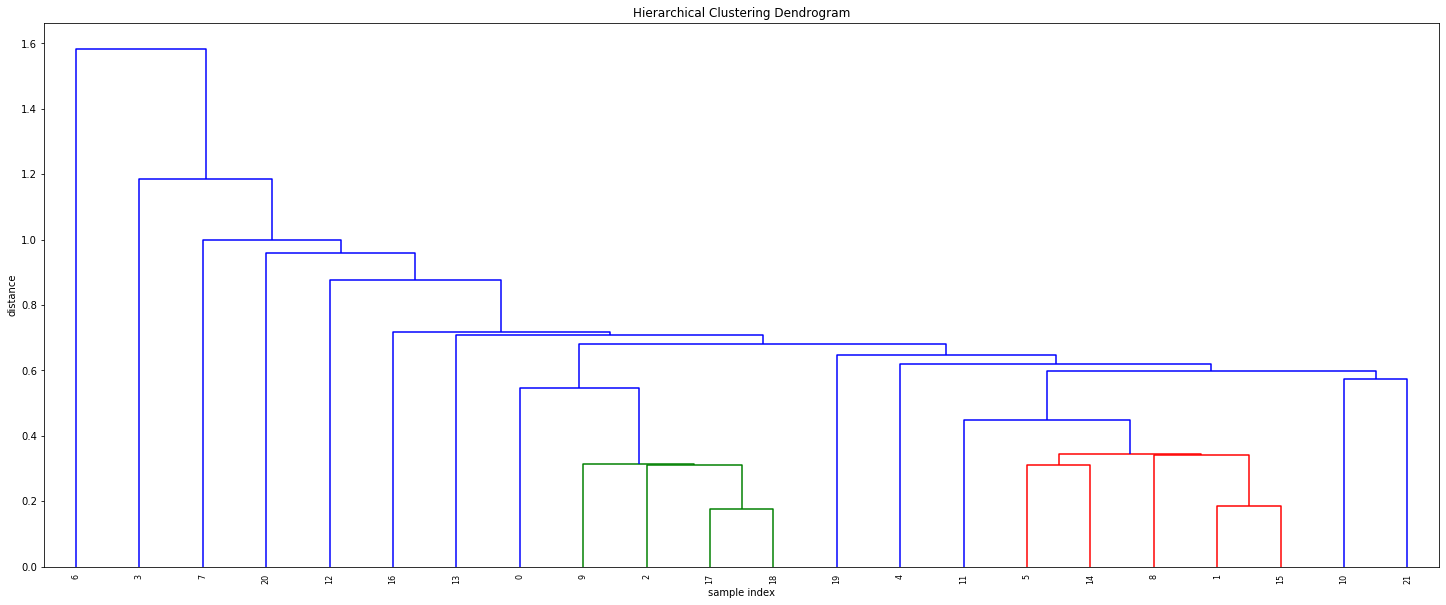

In [6]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    color_threshold=0.4,
)
plt.show()

In [7]:
Z

array([[17.   , 18.   ,  0.175,  2.   ],
       [ 1.   , 15.   ,  0.185,  2.   ],
       [ 2.   , 22.   ,  0.309,  3.   ],
       [ 5.   , 14.   ,  0.309,  2.   ],
       [ 9.   , 24.   ,  0.315,  4.   ],
       [ 8.   , 23.   ,  0.34 ,  3.   ],
       [25.   , 27.   ,  0.344,  5.   ],
       [11.   , 28.   ,  0.449,  6.   ],
       [ 0.   , 26.   ,  0.547,  5.   ],
       [10.   , 21.   ,  0.573,  2.   ],
       [29.   , 31.   ,  0.597,  8.   ],
       [ 4.   , 32.   ,  0.62 ,  9.   ],
       [19.   , 33.   ,  0.646, 10.   ],
       [30.   , 34.   ,  0.679, 15.   ],
       [13.   , 35.   ,  0.709, 16.   ],
       [16.   , 36.   ,  0.717, 17.   ],
       [12.   , 37.   ,  0.877, 18.   ],
       [20.   , 38.   ,  0.96 , 19.   ],
       [ 7.   , 39.   ,  0.997, 20.   ],
       [ 3.   , 40.   ,  1.186, 21.   ],
       [ 6.   , 41.   ,  1.583, 22.   ]])

In [8]:
max_d = 0.4
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 2,  3,  1, 14,  7,  3, 15, 13,  3,  1,  5,  4, 11,  9,  3,  3, 10,
        1,  1,  8, 12,  6], dtype=int32)

In [11]:
clust_names = [(i, p, clusters[i]) for i, p in enumerate(structs)]
clust_names

[(0, b'x0072', 2),
 (1, b'x0104', 3),
 (2, b'x0107', 1),
 (3, b'x0161', 14),
 (4, b'x0195', 7),
 (5, b'x0305', 3),
 (6, b'x0354', 15),
 (7, b'x0387', 13),
 (8, b'x0395', 3),
 (9, b'x0397', 1),
 (10, b'x0426', 5),
 (11, b'x0434', 4),
 (12, b'x0540', 11),
 (13, b'x0678', 9),
 (14, b'x0874', 3),
 (15, b'x0946', 3),
 (16, b'x0967', 10),
 (17, b'x0991', 1),
 (18, b'x0995', 1),
 (19, b'x1077', 8),
 (20, b'x1093', 12),
 (21, b'x1249', 6)]